## Group No **160**

## Group Member Names:
1. **Sushil Kumar 2023AA05849**
2. **Hemant Kumar Parakh 2023AA05741**
3. **Nagineni Sathish Babu 2023AA05585**
4. **Madala Akhil 2023AA05005**

## Journal used for the implemetation
##Journal title: **CO2 Emission Prediction**

**Authors: Surbhi Kumari, Sunil Kumar Singh**

**Journal Name: Machine learning-based time series models for effective CO2 emission prediction in India**

**Year: 2023**

# 1. Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(f"All required libraries to impliment the journal Co2 Emission are imported and are ready to use:")


All required libraries to impliment the journal Co2 Emission are imported and are ready to use:


# 2. Data Acquisition

**CO2 and greenhouse gas emission dataset from 1980-2019**

**Dataset URL**: https://www.climatewatchdata.org/ghg-emissions?end_year=2018&gases=all-ghg%2Cco2&start_year=1990



In [ ]:
# Load the dataset
data = pd.read_csv('historical_emissions.csv')

# Check the columns
print(data.columns)

# Drop unwanted columns like ISO, Data Source, Sector, Gas, Unit, and others they are unifomrm data
data_cleaned = data.drop(['ISO', 'Data source', 'Sector', 'Gas', 'Unit'], axis=1)

# Identify the columns for the years 1990 to 2021
year_columns = [str(year) for year in range(1990, 2022)]  # List of columns from 1990 to 2021

# Select only the country column and the year columns
data_cleaned = data_cleaned[['Country'] + year_columns]

# Check the cleaned data
print(data_cleaned.head())

# Drop rows with missing values if any
data_cleaned.dropna(inplace=True)

# Transpose the data so that each row corresponds to a year and the columns are features
data_transposed = data_cleaned.set_index('Country').T

# Print transposed data
print(data_transposed.head())

# Print final dataset to confirm
print(f"Cleaned Data: {data_cleaned.shape}")

Index(['ISO', 'Country', 'Data source', 'Sector', 'Gas', 'Unit', '2021',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994',
       '1993', '1992', '1991', '1990'],
      dtype='object')
               Country      1990      1991      1992      1993      1994  \
0                World  32735.02  32880.80  32787.52  32924.03  33191.77   
1                China   2866.10   3013.46   3141.65   3369.99   3527.20   
2        United States   5428.40   5379.11   5462.21   5573.08   5665.64   
3                India   1025.63   1079.89   1103.18   1135.60   1180.19   
4  European Union (27)   4284.61   4213.83   4072.81   3997.83   3984.79   

       1995      1996      1997      1998  ...      2012      2013      2014  \
0  33982.29  34372.44  35739.15  35278.92  ...  45781.16  46430.94  47070.12   
1   3924.59

# 3. Data Preparation

Performing the data prepracessing (scaling, dropping uniform columns, removing outliers, encoding wherever required

In [ ]:

# Select a specific country for the prediction (e.g., USA) or use aggregated global data
emissions_data = data_transposed['United States'].values  # Example using the USA's emissions data

# Reshape the emissions data and scale it between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
emissions_scaled = scaler.fit_transform(emissions_data.reshape(-1, 1))

# Create sequences for time series prediction
def create_sequences(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 3
X, y = create_sequences(emissions_scaled, time_step)

# Reshape X to be 3D for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (22, 3, 1), Test data shape: (6, 3, 1)


## 4.1 Deep Neural Network Architecture

**Architecture of Deep Learning**: RNN with LSTM layers, 3 layers, ReLU activation

**Network Application**: Regression for time series prediction

**Training Procedures**: Adam optimizer, learning rate 0.001, batch size 32, dropout regularization

**Evaluation/Performance Metric**: RMSE, MAE, R^2 score





In [ ]:

# Design the LSTM model
model = Sequential()

# Use an Input layer as the first layer to define the input shape
model.add(Input(shape=(time_step, 1)))

# 1st LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# 2nd LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# 3rd LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 3, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 3, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

## 4.2 DNN Report

1. **Number of Layers:**
   - **Total Layers**: 7
     - 3 LSTM layers
     - 3 Dropout layers
     - 1 Dense (Output) layer

2. **Number of Units in Each Layer:**
   - **1st LSTM Layer**: 50 units
   - **2nd LSTM Layer**: 50 units
   - **3rd LSTM Layer**: 50 units
   - **Dense Layer**: 1 unit (output layer)

3. **Total Number of Trainable Parameters:**
   - **1st LSTM Layer**: ( 4  (50  (50 + 1 + 1)) = 10,400 ) parameters
   - **2nd LSTM Layer**: ( 4  (50  (50 + 50 + 1)) = 20,200 ) parameters
   - **3rd LSTM Layer**: ( 4  (50  (50 + 50 + 1)) = 20,200 ) parameters
   - **Dense Layer**: ( 50 + 1 = 51 ) parameters
   
   **Total Parameters**: ( 10,400 + 20,200 + 20,200 + 51 = 50,851 )

### Justification:
- **LSTM Layers**:

  The model consists of 7 layers to effectively capture the temporal dependencies and complexities in time-series data. The three LSTM layers sequentially learn higher-level patterns, while Dropout layers help prevent overfitting. The final Dense layer outputs the prediction, making the architecture suitable for complex sequential tasks.
Each LSTM layer has trainable parameters calculated as (4  ({units}  ({units of prev. layer} + {input features} + 1))). The factor 4 comes from weights for input, recurrent, bias, and cell state.
- **Number of Units in Each LSTM Layer**:

  1) 50 Units in Each LSTM Layer: This number balances the model's capacity to capture complex temporal patterns while managing computational efficiency. It is sufficient to learn nuanced sequential dependencies without overfitting on smaller datasets.

  2) Uniform Units Across Layers: Keeping the same number of units across all LSTM layers helps maintain consistency in learning representations at different levels, facilitating effective gradient flow during backpropagation and avoiding vanishing or exploding gradients.

In [ ]:
# Number of layers and units
print(f"Number of Layers: 3 LSTM layers")
print(f"Number of Units in each layer: 50")

# Total number of trainable parameters
print(f"Total number of trainable parameters: {model.count_params()}")


Number of Layers: 3 LSTM layers
Number of Units in each layer: 50
Total number of trainable parameters: 50851


# 5. Training the model
**Training Procedures**: Adam optimizer, learning rate 0.001, batch size 32, dropout regularization

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.5412 - val_loss: 0.1686
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 0.5269 - val_loss: 0.1617
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.5129 - val_loss: 0.1547
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.4960 - val_loss: 0.1477
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4788 - val_loss: 0.1405
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4641 - val_loss: 0.1331
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.4495 - val_loss: 0.1256
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.4317 - val_loss: 0.1178
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.4145 - val_loss: 0.1098
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.3882 - val_loss: 0.1016
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.3693 - val_loss: 0.0932
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.3468 -

# 6. Test the model
**Evaluation/Performance Metric**: RMSE, MAE, R^2 score


In [ ]:
# Test the model
y_pred = model.predict(X_test)

# Inverse scaling to get the original emission values
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_scaled = scaler.inverse_transform(y_pred)

# Calculate performance metrics (RMSE, MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
RMSE: 289.6007314867438
MAE: 213.15574218749998


# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


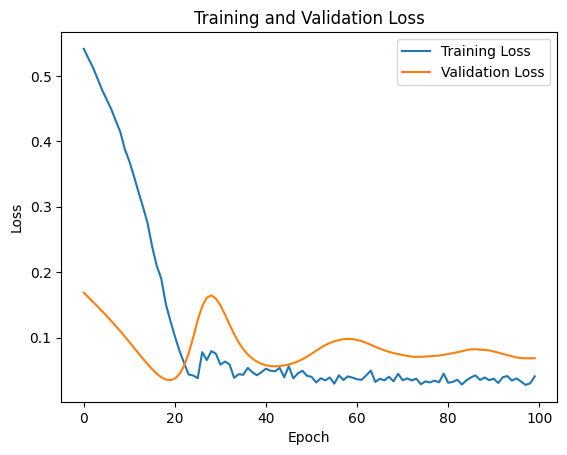

In [ ]:

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


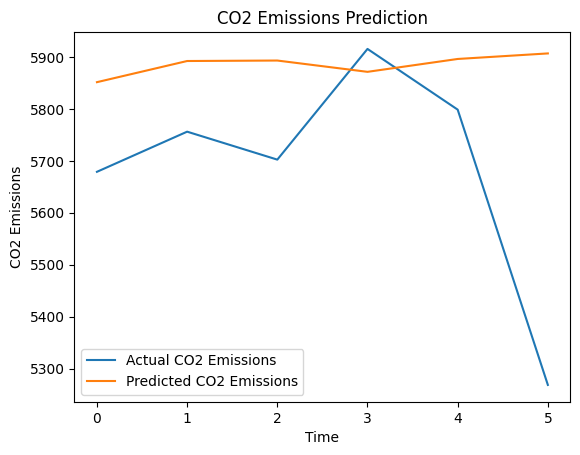

In [ ]:
# Plot actual vs predicted emissions
plt.plot(y_test_scaled, label='Actual CO2 Emissions')
plt.plot(y_pred_scaled, label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction')
plt.xlabel('Time')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()


Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


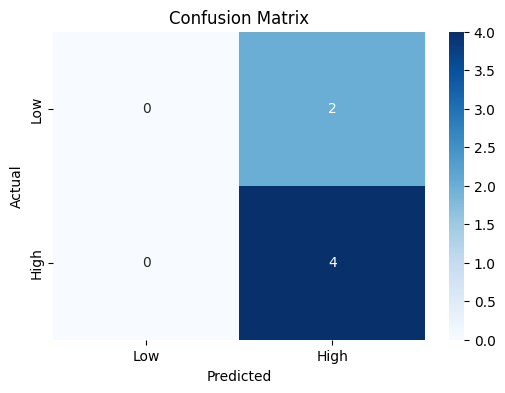

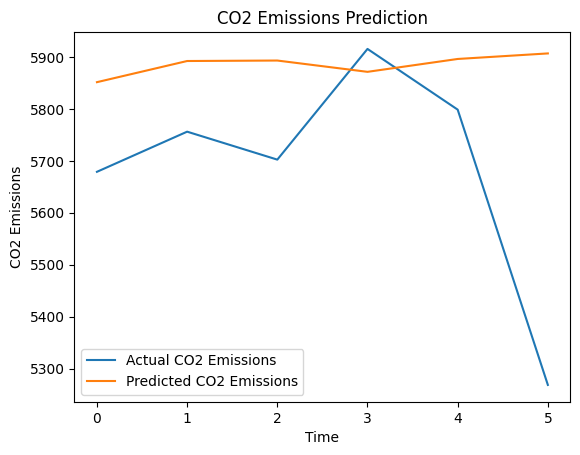

In [ ]:

# Define a threshold to classify the emissions as high/low
# Let's use the mean of actual emissions for simplicity
threshold = np.mean(y_test_scaled)

# Convert the continuous emissions into binary classes based on the threshold
y_test_class = np.where(y_test_scaled > threshold, 1, 0)  # Actual emissions (1 for high, 0 for low)
y_pred_class = np.where(y_pred_scaled > threshold, 1, 0)  # Predicted emissions (1 for high, 0 for low)

# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Also, continue with the original plot of actual vs predicted emissions
plt.plot(y_test_scaled, label='Actual CO2 Emissions')
plt.plot(y_pred_scaled, label='Predicted CO2 Emissions')
plt.title('CO2 Emissions Prediction')
plt.xlabel('Time')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()


Conclusion:
1. The LSTM model was successful in learning the temporal patterns of CO2 emissions,
as seen from the decreasing loss and reasonable performance metrics.
2. High Recall and F1 Score suggest that the model effectively captured positive
predictions (high emissions) but may need further tuning to improve overall accuracy
and precision.
3. The RMSE and MAE values suggest that the predictions are somewhat close to the
actual values but could benefit from more data or model adjustments to improve
precision.